### Penguins dataset exploration

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
penguins = sns.load_dataset('penguins')

#explore the data, print first and last 5 rows
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### Data Cleaning

In [3]:
#check columns and data type
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


- There are 342 out of 344 rows with non-null values implying 2 missing entries in `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g`

- From the data exploration above, indices 3 and 339 have `NaN` values for all columns except `species` and `island`

In [4]:
#Keep only the rows with at least 4 non-NA values
penguins.dropna(thresh=4, inplace = True)

In [5]:
#update datatype to categorical
penguins["species"] = penguins["species"].astype('category')
penguins["island"] = penguins["island"].astype('category')
penguins["sex"] = penguins["sex"].astype('category')

#recheck data
penguins.info()
penguins

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   bill_length_mm     342 non-null    float64 
 3   bill_depth_mm      342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


- Changing the datatype to categorical saves memory usage from 18.9+ KB to 14.7KB

- Indices 3 and 339 were dropped from the dataset


#### Exploratory Data Analysis

In [6]:
#summary statistics of numerical datatype
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


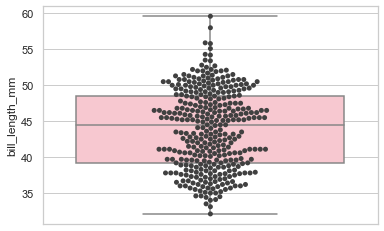

In [7]:
sns.set_theme(style="whitegrid")
bl = sns.boxplot(y='bill_length_mm', data = penguins, color ='pink' )
bl = sns.swarmplot(y = 'bill_length_mm', data = penguins, color=".25")

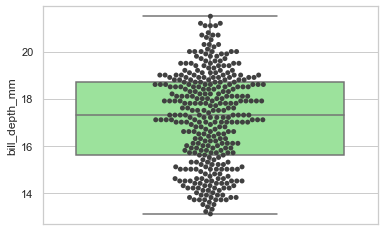

In [8]:
bd = sns.boxplot(y='bill_depth_mm', data = penguins, color ='lightgreen' )
bd = sns.swarmplot(y = 'bill_depth_mm', data = penguins, color=".25")

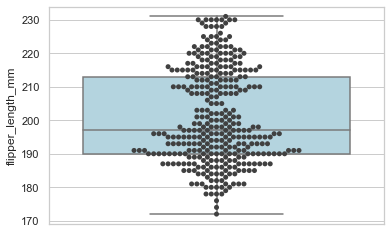

In [9]:
fl = sns.boxplot(y='flipper_length_mm', data = penguins, color ='lightblue' )
fl = sns.swarmplot(y = 'flipper_length_mm', data = penguins, color=".25")

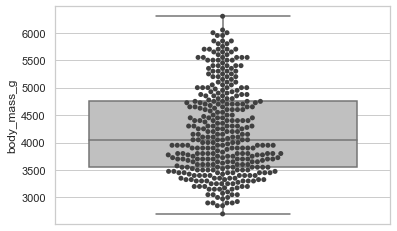

In [10]:
bm = sns.boxplot(y='body_mass_g', data = penguins, color ='silver' )
bm = sns.swarmplot(y = 'body_mass_g', data = penguins, color=".25")

In [11]:
#summary statistics of categorical datatype
penguins['species'].value_counts(normalize=True)

Adelie       0.441520
Gentoo       0.359649
Chinstrap    0.198830
Name: species, dtype: float64

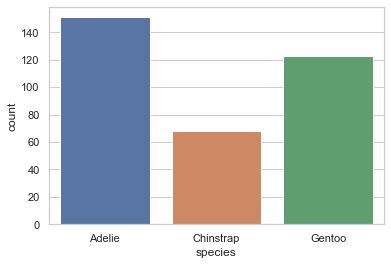

In [12]:
sp = sns.countplot(x='species', data = penguins)

In [13]:
penguins['island'].value_counts(normalize=True)

Biscoe       0.488304
Dream        0.362573
Torgersen    0.149123
Name: island, dtype: float64

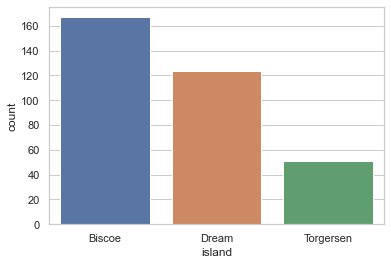

In [14]:
il = sns.countplot(x='island', data = penguins)

In [15]:
penguins['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

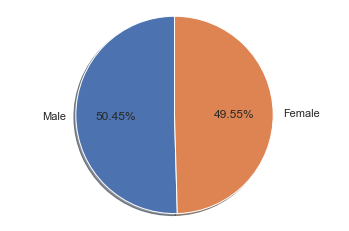

In [16]:
labels = 'Male', 'Female'

sx, ax = plt.subplots()
ax.pie(penguins['sex'].value_counts(), labels = labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax.axis('equal')
plt.show()

- From the `value_counts`, it seems that `species` and `island` are proportional - probably certain species can be found to specific islands.

- The `sex` of the pegiuns is almost evenly split at 50.45% `Male` and 49.55% `Female`

#### Multi-column Analysis

In [17]:
sp = penguins.groupby(by='island')['species'].value_counts(sort=False)
sp_pct = penguins.groupby(by='island')['species'].value_counts(normalize=True, sort=False)
pd.concat([sp, sp_pct], axis=1)

species   species
island    species                     
Biscoe    Adelie          44  0.263473
          Gentoo         123  0.736527
Dream     Adelie          56  0.451613
          Chinstrap       68  0.548387
Torgersen Adelie          51  1.000000

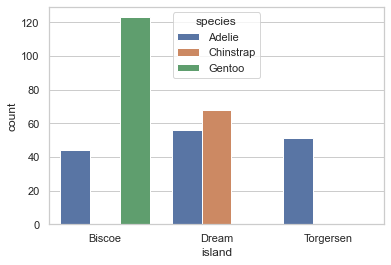

In [18]:
sp_is = sns.countplot(x='island', hue = 'species', data = penguins)

- We can see that `Adelie` lives in all 3 islands.
- In `Biscoe`, `Gentoo` accounts for more than 73% while `Adelie` accounts for only 26%
- In `Dream`, `Chinstrap` accounts to more than half at 55% compared `Adelie` which only accounts to 45% 
- In `Torgensen`, `Adelie` is the only specie residing on this island.

In [19]:
#checking correlation of numerical datatype
penguins.corr(method='pearson')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


- From the table above, there is a strong positive correlation between `flipper_length_mm` and `body_mass_g` at `0.871202` which means that penguins with longer flipper length tends to be weigh more
- There is also a positive correlation between `flipper_length_mm` and `bill_length_mm` at 0.656181 (not a strong correlation)
- Suprisingly, there is a negative correlation between `flipper_length_mm` and `bill_depth_mm` at -0.583851 (not a strong correlation) as well as `bill_length_mm` and  `bill_depth_mm` at -0.235053 (not a strong correlation)

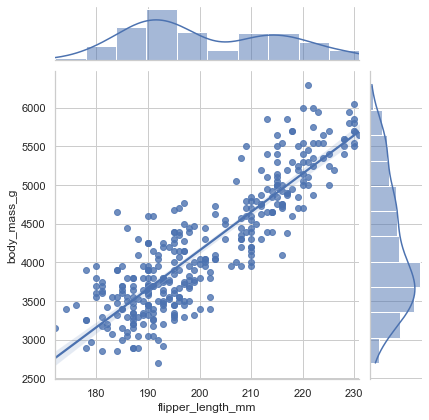

In [20]:
fl_bm = sns.jointplot(x = 'flipper_length_mm', y = 'body_mass_g', kind ='reg', data=penguins)

- The figure shows the distribution of `flipper_length_mm` and `body_mass_g` and the fitted lines with 95% confidence interval
- Although there is a strong correlation between these 2 attributes, most of the data points fall outside the 95% confidence interval

In [ ]:
fig = sns.PairGrid(data = penguins, hue = 'species')
fig.map_upper(sns.scatterplot)
fig.map_lower(sns.regplot ,scatter_kws ={'s':5})
fig.map_diag(sns.histplot)
fig.add_legend()
plt.show()

- For `bill_length_mm`, `Chinstrap` seems to have the longest bill followed by `Gentoo` and lastly `Adelie`
- For `bill_depth_mm`, `Gentoo` has the shallowest bill while `Adelie` and `Chinstrap` have deeper bills
- For `flipper_length_mm`, `Gentoo` has the longest flippers, followed by `Chinstrap` and `Adelie`
- For `body_mass_g`, `Gentoo` has heaviest weight, followed by `Chinstrap` and `Adelie`
- The scatterplots shows some clustering among the pengiun species. `bill_length_mm` shows the most visible clusters among the species

In [ ]:
sx_bm = sns.FacetGrid(data=penguins, col = 'sex', hue = 'species')
sx_bm.map(sns.histplot, 'body_mass_g')
sx_bm.add_legend()

- `Male` penguins are generally heavier than `Female`

In [ ]:
sx_fl = sns.FacetGrid(data=penguins, col = 'sex', hue = 'species')
sx_fl.map(sns.histplot, 'flipper_length_mm')
sx_fl.add_legend()

- It seems that there is no significant difference between `Male` and `Female` penguins in terms of `flipper_length_mm`

In [ ]:
sx_bl = sns.FacetGrid(data=penguins, col = 'sex', hue = 'species')
sx_bl.map(sns.histplot, 'bill_length_mm')
sx_bl.add_legend()

- It seems that there is no significant difference between `Male` and `Female` penguins in terms of `bill_length_mm` although there are some outliers for both sexes around 60mm

In [ ]:
sx_bd = sns.FacetGrid(data=penguins, col = 'sex', hue = 'species')
sx_bd.map(sns.histplot, 'bill_depth_mm')
sx_bd.add_legend()

- It seems that there is no significant difference between `Male` and `Female` penguins in terms of `bill_depth_mm`

### References:


- https://stackoverflow.com/questions/66590792/matplotlib-and-pandas-change-colors-of-negative-values

- https://stackoverflow.com/questions/31556446/how-to-draw-axis-in-the-middle-of-the-figure7